***
# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 1</font>
***

# <font color=green>1 CONHECENDO OS DADOS</font>
***

## <font color=green>1.1 Dataset do projeto</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo	
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados| 
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

### Importando pandas e lendo o dataset do projeto

https://pandas.pydata.org/

In [1]:
import pandas as pd

In [2]:
dados = pd.read_csv('dados.csv')

Com o método head() do Pandas, visualizaremos somente os cinco primeiros registros de dados.

In [3]:
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


## <font color=green>1.2 Tipos de dados</font>
***

Os tipos de dados devem ser bem entendidos, pois cada um deles possui um tipo de estatística e tratamento da informação, então é importante os identificarmos corretamente.

Classificaremos os dados entre basicamente dois tipos: qualitativos e quantitativos. O primeiro expressa uma qualidade ou atributo dos dados, enquanto o segundo faz contagens e mensurações.

Entenderemos a partir do nosso DataFrame; UF é bastante simples de classificarmos como qualitativo, pois não é uma contagem, e o mesmo vale para Sexo e Cor. Enquanto a Idade, Renda e Altura são quantitativos.

Já Anos de Estudo é uma variável de dados qualitativos também, afinal cada código numérico representa uma classe. Veremos isso no caso de 16 ser relativo a 15 anos ou mais, e 0 como Sem instrução e menos de 1 ano por exemplo.

Cada classificação pode ser dividida em duas categorias. No caso dos qualitativos, teremos os ordinais e nominais.

Já os quantitativos se dividem em discretos e contínuos. Veremos exemplos de cada um mais adiante com o uso do Python e Pandas.

### <font color=green>Variáveis qualitativas ordinais</font>

► Variáveis que podem ser ordenadas ou hierarquizardas

Começando pelas variáveis qualitativas ordinais, não identificaremos as Sexo, Cor e UF como tais, pois não podemos hierarquizá-los neste caso, afinal cada código foi atribuído a cada classe sem uma ordem lógica.

Já no caso de Anos de Estudo, conseguiremos fazer uma ordenação, então poderemos classificá-la desta forma. Caso queiramos visualizar o tipo deste dado por exemplo, bastará escrevermos dados[] contendo a variável entre aspas simples na parte de "1.2 Variáveis qualitativas ordinais" no notebook.

In [4]:
dados['Anos de Estudo']

0        12
1        12
2        15
3         6
4         9
         ..
76835    11
76836     7
76837    12
76838     4
76839     4
Name: Anos de Estudo, Length: 76840, dtype: int64

Para vermos apenas os valores únicos, aplicaremos .unique() ao comando da célula.

In [5]:
dados['Anos de Estudo'].unique()

array([12, 15,  6,  9, 14, 16, 10,  1,  5,  7,  3,  2,  4,  8, 11, 17, 13],
      dtype=int64)

O resultado será um array() fora de ordenação. Para ordenarmos os dados, adicionaremos a building function do Python chamada sorted() que receberá todo o conteúdo desta célula.

In [6]:
sorted(dados['Anos de Estudo'].unique())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

### <font color=green>Variáveis qualitativas nominais</font>

► Variáveis que não podem ser ordenadas ou hierarquizardas

Abordando as qualitativas nominais, teremos Sexo, Cor e UF. As imprimiremos na célula desta parte do notebook. Usaremos o mesmo comando executado anteriormente, alterando apenas o conteúdo de dados[] com as variáveis corretas.

In [7]:
sorted(dados['Sexo'].unique())

[0, 1]

In [8]:
sorted(dados['Cor'].unique())

[0, 2, 4, 6, 8]

In [9]:
sorted(dados['UF'].unique())

[11,
 12,
 13,
 14,
 15,
 16,
 17,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 31,
 32,
 33,
 35,
 41,
 42,
 43,
 50,
 51,
 52,
 53]

Desta forma, veremos a numeração do código atribuída pelos profissionais do IBGE.

Estes valores não podem ser hierarquizados para serem ordenados, o qua as classificam como qualitativas nominais.

### <font color=green> Variáveis quantitativas discretas </font>

► Variáveis que representam uma contagem onde os valores possíveis formam um conjunto finito ou enumerável.

Faremos uma impressão com print() recebendo as Idades minima e Máxima.

In [10]:
print(f'As Idades do DataFrame vão de {dados.Idade.min()} até {dados.Idade.max()}')

As Idades do DataFrame vão de 13 até 99


#### <font color='red'>Observação</font>
***
> A variável idade pode ser classificada de três formas distintas:
> 1. <b>QUANTITATIVA DISCRETA</b> - quando representa anos completos (números inteiros);
> 2. <b>QUANTITATIVA CONTÍNUA</b> - quando representa a idade exata, sendo representado por frações de anos; e
> 3. <b>QUALITATIVA ORDINAL</b> - quando representa faixas de idade.

### Variáveis quantitativas contínuas

► Variáveis que representam uma contagem ou mensuração que assumem valores em uma escala contínua (números reais).

Com isso, veremos o intervalo entre o valor mínimo e o máximo da variável Altura medido em metros.

In [11]:
print(f'As Alturas do DataFrame vão de {dados.Altura.min()} até {dados.Altura.max()}')

As Alturas do DataFrame vão de 1.339244614 até 2.028496765


### Classificação de uma variável
<img src='https://caelum-online-public.s3.amazonaws.com/1177-estatistica-parte1/01/img001.png' width='70%'>

Em resumo, teremos a variável qualitativa ordinal Anos de Estudo e as qualitativas nominais Sexo, Cor e UF, bem como a quantitativa discreta Idade e a quantitativa contínua Altura.

Com isso, avançaremos para o estudo da Distribuição de Frequências; a seguir, usando a biblioteca Pandas, aprenderemos como calculá-la para determinados tipos de variáveis, pois há maneiras diversas de lidarmos com cada um.

# <font color=green>2 DISTRIBUIÇÃO DE FREQUÊNCIAS</font>
***

O primeiro passo em um trabalho de análise é o conhecimento do comportamento das variáveis envolvidas no estudo. Utilizando técnicas estatísticas como as análises das <b>DISTRIBUIÇÕES DE FREQUÊNCIAS</b> e <b>HISTOGRAMAS</b> podemos avaliar melhor a forma como os fenômenos em estudo se distribuem.

## <font color=green>2.1 Distribuição de frequências para variáveis qualitativas</font>
***

Na seção de Distribuição de Frequências, começaremos com uma técnica de sumarização para entendermos como as variáveis se distribuem, vendo se são assimétricas ou se são distribuídas normalmente, se conseguiremos detectar outlier, ou se precisam de algum tipo de transformação por exemplo.

São técnicas estatísticas que lidam com um conjunto de variáveis e buscam conhecer seus comportamentos, passando primeiro por formas gráficas chamadas histogramas que auxiliam na análise da Distribuição de Frequências nos dados.

### Método 1

https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.Series.value_counts.html



<img src='value_counts.png' width='100%'>

Nesta mesma parte, iniciaremos com as qualitativas que são naturalmente categorizadas, então não precisaremos nos preocupar com isso. Como vimos anteriormente, serão as Sexo, UF e Cor.

Na primeira célula, chamaremos os dados[] de 'Sexo' e faremos a contagem com o método .value_counts(). Executando este comando, veremos a quantidade de ocorrências para cada categoria desta variável.

In [12]:
dados.Sexo.value_counts()

0    53250
1    23590
Name: Sexo, dtype: int64

O retorno da execução mostra 53250 para a categoria 0 relativa ao sexo masculino, e 23590 para o feminino. Sabemos que isso não corresponde à realidade onde a maioria da população brasileira é composta por mulheres, porém a coleta dessas informações foi baseada em somente registros das pessoas de referência de cada domicílio, ou seja, o responsável pela casa que respondeu o questionário da pesquisa, e neste caso a maioria das respostas foi dada por homens, resultando nos valores que vimos.

Outra informação importante que costuma aparecer nas tabelas de frequências é este mesmo retorno representado de forma percentual. Para fazermos isso, usaremos o mesmo método .value_counts() recebendo o parâmetro normalize sendo igual a true.

In [13]:
dados.Sexo.value_counts(normalize = True) * 100

0    69.299844
1    30.700156
Name: Sexo, dtype: float64

Isto normalizará os dados e os colocarão na base 1. Se ainda multiplicarmos por 100, veremos a porcentagem de aproximadamente 70% de pessoas do sexo masculino e 30% do feminino que responderam ao questionário.

Para melhorarmos a apresentação dos dados, inseriremos o primeiro comando somente com .value_counts() sem parâmetro dentro de uma variável frequencia.

In [14]:
frequencia = dados.Sexo.value_counts()

Feito isso, teremos uma series do Pandas. Faremos a mesma coisa com o comando que apresenta o percentual, e o colocaremos dentro da variável percentual na célula seguinte.

In [15]:
percentual = dados.Sexo.value_counts(normalize = True) * 100
percentual

0    69.299844
1    30.700156
Name: Sexo, dtype: float64

Para organizarmos melhor a apresentação, colocaremos tudo isso dentro de um novo DataFrame que representará a Tabela de Frequências a ser apresentada.

Então, chamaremos de dist_freq_qualitativas sendo igual a pd.DataFrame() para o criarmos, onde passaremos um dicionário Python com {} contendo as duas series criadas anteriormente. A primeira coluna será a 'Frequência' como se fosse um arquivo .json, e então adicionaremos a variável frequencia após :.

Após a vírgula, colocaremos a segunda coluna 'Porcentagem (%)' visto que já multiplicamos por 100, então não precisaremos formatar o número novamente. Por fim, passaremos a variável percentual após : de novo.

In [16]:
dist_freq_qualitativas = pd.DataFrame({'Frequência': frequencia, 'Porcentagem (%)': percentual})
dist_freq_qualitativas

,Frequência,Porcentagem (%)
0,53250,69.299844
1,23590,30.700156


Como vimos anteriormente, a codificação 0 e 1 da variável Sexo correspondem às respostas "masculino" e "feminino" do questionário. Então deveremos deixar bem claro o que cada código significa.

Portanto, atribuiremos labels ou etiquetas. Na célula seguinte, chamaremos dist_freq_qualitativas com .rename() para renomearmos o index como um dicionário também, dizendo que 0 corresponde a 'Masculino' e 1 a 'Feminino'.

Para sobrescrevermos e salvarmos as mudanças no arquivo, deveremos inserir o parâmetro inplace sendo igual a True no comando anterior.

In [17]:
dist_freq_qualitativas.rename(index = {0: 'Masculino', 1: 'Feminino'}, inplace=True)
dist_freq_qualitativas

,Frequência,Porcentagem (%)
Masculino,53250,69.299844
Feminino,23590,30.700156


Feito isso, o sistema criará e salvará o dicionário. Logo, poderemos apenas chamar a dist_freq_qualitativas e executá-la na célula para visualizarmos as etiquetas dos códigos de Sexo.

Também é possível adicionarmos um título para a tabela com o DataFrame seguido de .rename_axis(), onde passaremos o nome 'Sexo' que queremos para a coluna das labels.

Como podemos renomear tanto uma coluna quanto uma linha, deveremos indicar qual é o eixo axis que queremos. Neste caso, o Pandas reconhecerá 1 como coluna e 0 como linha, mas para não nos confundirmos, escreveremos 'columns' ou 'rows' que funcionam da mesma forma.

Não poderemos esquecer de colocar inplace igual a True para salvarmos as alterações.

In [18]:
dist_freq_qualitativas.rename(index = {0: 'Masculino', 1: 'Feminino'}, inplace = True)
dist_freq_qualitativas.rename_axis('Sexo', axis = 'columns', inplace = True)
dist_freq_qualitativas

Sexo,Frequência,Porcentagem (%)
Masculino,53250,69.299844
Feminino,23590,30.700156


Com isso, teremos uma Tabela de Frequências nomeada com clareza que poderemos copiar, colar e apresentar que será bem entendida. É interessante realizarmos os mesmos exercícios com as outras variáveis qualitativas que temos para aprimorarmos as habilidades.

### Método 2

https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.crosstab.html

<img src='crosstab.png'>

Continuando com a construção das tabelas de Distribuição de Frequências, conheceremos o método .crosstab() de Pandas que faz o cruzamento entre variáveis.

Faremos um dicionário que transformará o dado numérico em uma string, baseando-se nas variáveis do database.

In [19]:
sexo = {0: 'Masculino',
        1: 'Feminino'}

cor = {0: 'Indígena',
        2: 'Branca',
        4: 'Preta',
        6: 'Amarela',
        8: 'Parda',
        9: 'Sem declaração'}

Construiremos a tabela na célula seguinte, e escreveremos que frequencia será igual a pd.crosstab() recebendo a variável Sexo nas linhas e Cor nas colunas.

In [20]:
frequencia = pd.crosstab(dados.Sexo,
                         dados.Cor
                        )
frequencia

Cor,0,2,4,6,8
Sexo,,,,,
0,256,22194,5502,235,25063
1,101,9621,2889,117,10862


Os valores da tabela correspondem ao cruzamento das variáveis em questão.

Para visualizarmos melhor, renomearemos a tabela de frequencia com .rename() recebendo o parâmetro index igual ao dicionário sexo para o caso das linhas.

Em seguida, passaremos também o inplace igual a True para que já modifique diretamente o próprio DataFrame que está tratando. Caso contrário, escreveríamos somente frequencia igual a frequencia.rename() recebendo apenas o index.

In [21]:
frequencia = pd.crosstab(dados.Sexo,
                         dados.Cor)
frequencia.rename(index = sexo, inplace = True)
frequencia

Cor,0,2,4,6,8
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


Faremos a mesma coisa copiando e colando a linha de .rename() na sequência. Depois, substituiremos index por columns para o caso das colunas, recebendo ao dicionário cor.

In [22]:
frequencia = pd.crosstab(dados.Sexo,
                         dados.Cor)
frequencia.rename(index = sexo, inplace = True)
frequencia.rename(columns = cor, inplace = True)
frequencia

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


Feito isso, a visualização do cruzamento e as análises dos dados ficarão mais claras.

Em seguida, criaremos a tabela de percentuais. Copiaremos o mesmo bloco de código anterior, e substituiremos frequencia por percentual.

Dentro do .crosstab(), escreveremos normalize igual a True para normalizarmos os valores. Por fim, multiplicaremos por 100.

In [23]:
percentual = pd.crosstab(dados.Sexo,
                         dados.Cor,
                         normalize = True).round(4) * 100
percentual.rename(index = sexo, inplace = True)
percentual.rename(columns = cor, inplace = True)
percentual

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,0.33,28.88,7.16,0.31,32.62
Feminino,0.13,12.52,3.76,0.15,14.14


Este método também permite que façamos agregações de acordo com uma determinada função usando outra variável dentro do cruzamento.

Por exemplo, copiaremos e colaremos o bloco anterior e substituiremos o parâmetro normalize pela função agregadora aggfunc igual a 'mean'.

Neste caso, calcularemos a média da Renda que será o parâmetro values. Por fim, tiraremos a multiplicação por 100.

In [24]:
percentual = pd.crosstab(dados.Sexo,
                         dados.Cor,
                         aggfunc = 'mean',
                         values = dados.Renda).round(2)
percentual.rename(index = sexo, inplace = True)
percentual.rename(columns = cor, inplace = True)
percentual

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,1081.71,2925.74,1603.86,4758.25,1659.58
Feminino,2464.39,2109.87,1134.60,3027.34,1176.76


Como resultado, calcularemos a renda média dentro do cruzamento de sexo e cor, o que gerará diversas análises do conjunto de dados. Por exemplo, poderemos comprovar que os homens brancos e amarelos possuem a maior média de renda, enquanto as mulheres negras e pardas recebem o menor rendimento, explicitando a desigualdade entre etnicas e gêneros.

## <font color=green>2.2 Distribuição de frequências para variáveis quantitativas (classes personalizadas)</font>
***

### Passo 1 - Especificar os limites de cada classe

<b>Continuando com o assunto de Distribuição de Frequências, trabalharemos com variáveis quantitativas neste passo, as quais não são naturalmente categorizadas.

O primeiro passo é gerarmos uma maneira de categorizá-las para construirmos a Distribuição, e nesta etapa aprenderemos a criar classes personalizadas.

Em nosso notebook, na parte "Passo 1 - Especificar os limites de cada classe" que diz respeito ao assunto, encontraremos um exemplo bastante conhecido da categorização em classes "A", "B", "C", "D" e "E" de acordo com a renda mensal.

Esta classificação se origina de um trabalho que faz a divisão em quantidade de salários mínimos que compõe o rendimento do domicílio:</b>

Utilizar a seguinte classificação:

<b>A</b> ► Acima de 20 SM

<b>B</b> ► De 10 a 20 SM

<b>C</b> ► De 4 a 10 SM

<b>D</b> ► De 2 a 4 SM

<b>E</b> ► Até 2 SM

onde <b>SM</b> é o valor do salário mínimo na época. Em nosso caso <b>R$ 788,00</b> (2015):

<b>A</b> ► Acima de 15.760

<b>B</b> ► De 7.880 a 15.760

<b>C</b> ► De 3.152 a 7.880

<b>D</b> ► De 1.576 a 3.152

<b>E</b> ► Até 1.576


Pimeiro, descobriremos quais são os valores mínimos e máximos da variável para construirmos a distribuição.

Na célula, usaremos os dados de .Renda com .min().

In [25]:
dados.Renda.min()

0

O retorno será 0 para o valor mínimo, logicamente. Depois, aplicaremos a mesma linha com .max() para o máximo.

In [26]:
dados.Renda.max()

200000

Como saída, o sistema apresentará o valor 200000 relativo ao valor máximo da variável.

Estas respostas nos farão refletir se estamos recebendo valores corretos ou se é um outlier. De qualquer maneira, anotaremos esta reflexão e lidaremos com ela mais adiante no curso.

Continuando, usaremos uma funcionalidade do Pandas chamada cut(), a qual precisa de alguns parâmetros que serão construídos previamente.

Começaremos pelos limites das classes de renda, e os colocaremos dentro da variável classes, a qual será uma lista de Python. Já sabemos o primeiro deles, ou seja, o valor mínimo 0 descoberto com .min().

O segundo limite 1576 será extraído da classe "E", o terceiro 3152 da "D", o quarto 7880 da "C", o quinto 15760 da "B" e o último 20000 relativo à classe "A" que foi retornado pelo método .max() anteriormente.

In [27]:
classes = [0, 1576, 3152, 7880, 15760, 200000]

Executada a célula e criada a variável classes, faremos uma visualização mais clara com labels para as categorias.

Na linha seguinte, criaremos a nova variável labels recebendo uma lista Python de novo, contendo os nomes entre aspas simples. 

Como começamos com a classe de menor valor, iniciaremos as etiquetas de 'E' e finalizaremos com a de maior valor 'A'.

In [28]:
labels = ['E', 'D', 'C', 'B', 'A']

### Passo 2 - Criar a tabela de frequências

https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.cut.html

Feito isso, entenderemos como o método cut() funciona em Pandas.

<img src='cut.png'>

Na primeira célula desta parte, escreveremos pd.cut() recebendo a variável dados.Renda que estamos trabalhando no parâmetro x. 

Já no segundo parâmetro bins, passaremos os limites das classes por meio de classes para que possa construí-las.

Como já criamos labels e queremos exibi-las, passaremos sua variável como terceiro parâmetro também chamado labels.

Por default, este método não inclui a classe inferior 0 nas classes, então precisaremos indicar ao cut() que queremos inseri-lo de fato, pois é relevante para nossa análise.

Para isso, usaremos o quarto parâmetro include_lowest sendo igual a True.

In [29]:
pd.cut(x = dados.Renda,
       bins = classes,
       labels = labels,
       include_lowest = True)

0        E
1        E
2        E
3        C
4        E
        ..
76835    E
76836    E
76837    E
76838    E
76839    E
Name: Renda, Length: 76840, dtype: category
Categories (5, object): ['E' < 'D' < 'C' < 'B' < 'A']

Continuando com esses dados, seguiremos a mesma metodologia adotada anteriormente; 

passaremos para o método value_counts(), mas o chamaremos de forma diferente; antes, escrevemos dados seguido da variável após o . e a função em questão para fazermos a contagem.

Agora, poderemos chamá-lo por meio do próprio Pandas, escrevendo apenas pd.value_counts() recebendo todo o código de cut() que acabamos de criar.

In [30]:
pd.value_counts(
    pd.cut(x = dados.Renda,
               bins = classes,
               labels = labels,
               include_lowest = True)
)

E    49755
D    16700
C     7599
B     2178
A      608
Name: Renda, dtype: int64

Nesta execução, veremos a contagem feita da maneira como queríamos.

Este comando é o mesmo que fizemos anteriormente com frequencia. Logo, poderemos chamar esta variável para apresentarmos os mesmos resultados.

In [31]:
frequencia = pd.value_counts(
    pd.cut(x = dados.Renda,
               bins = classes,
               labels = labels,
               include_lowest = True)
)
frequencia

E    49755
D    16700
C     7599
B     2178
A      608
Name: Renda, dtype: int64

Na célula seguinte, faremos a coluna de percentual. Para isso, passaremos o parâmetro normalize sendo igual a True dentro de value_counts(), como já vimos.

In [32]:
percentual = pd.value_counts(
    pd.cut(x = dados.Renda,
               bins = classes,
               labels = labels,
               include_lowest = True),
               normalize = True
)
percentual

E    0.647514
D    0.217335
C    0.098894
B    0.028345
A    0.007913
Name: Renda, dtype: float64

Por fim, aplicaremos a mesma técnica feita com dist_freq_qualitativas. Inclusive, poderemos copiar e colar esta linha feita anteriormente, para então alterarmos o que for necessário.

Logo, criaremos a nova variável dist_freq_quantitativas_personalizadas sendo igual a pd.DataFrame() recebendo a frequencia e o percentual da mesma maneira.

Em seguida, mostraremos o nosso resultado chamando a variável e executando a célula.

In [33]:
dist_freq_quantitativas_personalizadas = pd.DataFrame(
    {'Frequência': frequencia, 'Porcentagem (%)': percentual}
)
dist_freq_quantitativas_personalizadas

,Frequência,Porcentagem (%)
E,49755,0.647514
D,16700,0.217335
C,7599,0.098894
B,2178,0.028345
A,608,0.007913


Porém, a ordenação está sendo feita de E até A, e queremos seguir a ordem alfabética de A até E.

Então chamaremos a dist_freq_quantitativas_personalizadas com .sort_index() para ordenarmos o índice como ascending igual a False, pois não queremos o default.

In [34]:
dist_freq_quantitativas_personalizadas.sort_index(ascending = False)

,Frequência,Porcentagem (%)
A,608,0.007913
B,2178,0.028345
C,7599,0.098894
D,16700,0.217335
E,49755,0.647514


Será esta construção da Distribuição de Frequências que analisaremos mais adiante para tirarmos as conclusões.

Observando os dados, é possível visualizarmos a grande desigualdade social e precária distribuição de renda exposta pela pesquisa, visto que a grande maioria das pessoas pertence à classe "E" com menor rendimento e maior pobreza, enquanto as maiores rendas estão concentradas em uma porcentagem muito pequena de domicílios que corresponde à classe "A".

Também veremos estes resultados em forma de gráfico para podermos abordar a simetria.

## <font color=green>2.3 Distribuição de frequências para variáveis quantitativas (classes de amplitude fixa)</font>
***

### Importando bibliotecas

http://www.numpy.org/

In [35]:
import numpy as np

Veremos uma última maneira de construirmos as tabelas da Distribuição de Frequências quando não temos classes previamente organizadas, como era o caso no passo anterior com a classificação em "A", "B", "C" e etc.

Agora, aprenderemos a Regra de Sturges que otimiza a escolha da quantidade de classes que teremos nas tabelas de distribuições, considerando somente o número de observações que temos na variável.

### Passo 1 - Difinindo o número de classes

#### Regra de Sturges

# $$k = 1 + \frac {10}{3}\log_{10}n$$

A usaremos unicamente para podermos usar a função log10 da regra. Então a importaremos como np.

Esta somente precisará do número de observações como o "n" da fórmula. Para o encontrarmos na distribuição do dataset, criaremos a variável n e passaremos dados com .shape.

Em seguida, executaremos a célula com n.

In [36]:
n = dados.shape
n

(76840, 7)

O resultado será o número de registros e a quantidade de variáveis: (76840, 7).

Se quisermos apenas as observações, colocaremos 0 para .shape[] pegar somente o primeiro elemento.

In [37]:
n= dados.shape[0]
n

76840

Agora que sabemos que n é igual a 76840, descobriremos o número de classes de amplitude fixa por meio da regra de Sturges. Multiplicaremos por np com a função .log10() recebendo o valor de n.

In [38]:
k = 1 + (10 / 3) * np.log10(n)
k

17.285291187298853

Executando a célula, veremos que o valor de k é igual a 17.285291187298853.

Com isso, saberemos que uma boa forma de visualizarmos a tabela com a quantidade de registros que temos é de aproximadamente 17 classes.

Para arredondarmos o valor de fato, escreveremos que k é igual a k.round() recebendo 0 casas decimais na célula seguinte, e em seguida chamaremos apenas k novamente.

In [39]:
k = k.round(0)
k

17.0

O retorno será de 17.0, mas ainda queremos exibir um valor inteiro.

Logo, englobaremos k.round(0) na função int() do Python, resultando em 17 como queríamos.

In [40]:
k = int(k.round(0))
k

17

Anotaremos esta fórmula para criarmos o k sempre que precisarmos de seu valor.

O segundo passo é a mesma coisa que fizemos nas etapas anteriores com value_counts() e cut().

O parâmetro x será a Renda também, o segundo bins será o número 17 de classes de mesma amplitude que queremos.

Por fim, inseriremos o include_lowest igual a True para incluirmos o limite mais baixo.

In [41]:
pd.value_counts(
    pd.cut(
        x = dados.Renda,
        bins = 17,
        include_lowest = True
    )
)

(-200.001, 11764.706]       75594
(11764.706, 23529.412]       1022
(23529.412, 35294.118]        169
(35294.118, 47058.824]         19
(47058.824, 58823.529]         16
(94117.647, 105882.353]         6
(58823.529, 70588.235]          5
(70588.235, 82352.941]          4
(188235.294, 200000.0]          3
(82352.941, 94117.647]          1
(117647.059, 129411.765]        1
(105882.353, 117647.059]        0
(129411.765, 141176.471]        0
(141176.471, 152941.176]        0
(152941.176, 164705.882]        0
(164705.882, 176470.588]        0
(176470.588, 188235.294]        0
Name: Renda, dtype: int64

Neste resultado, veremos as 17 classes.

Notaremos que a classe com (188235.294, 200000.0] deveria estar em último lugar, já que possui o valor máximo.

Isso acontece porque a função value_counts() faz uma ordenação pelos valores da outra coluna, a qual está organizada do maior ao menor número.

Como queremos exibir a ordem correta das classes, o parâmetro sort deverá ser igual a False.

In [42]:
pd.value_counts(
    pd.cut(
        x = dados.Renda,
        bins = 17,
        include_lowest = True
    ),
    sort = False
)

(-200.001, 11764.706]       75594
(11764.706, 23529.412]       1022
(23529.412, 35294.118]        169
(35294.118, 47058.824]         19
(47058.824, 58823.529]         16
(58823.529, 70588.235]          5
(70588.235, 82352.941]          4
(82352.941, 94117.647]          1
(94117.647, 105882.353]         6
(105882.353, 117647.059]        0
(117647.059, 129411.765]        1
(129411.765, 141176.471]        0
(141176.471, 152941.176]        0
(152941.176, 164705.882]        0
(164705.882, 176470.588]        0
(176470.588, 188235.294]        0
(188235.294, 200000.0]          3
Name: Renda, dtype: int64

Desta forma, veremos a organização como queríamos. Para organizarmos do mesmo jeito que fizemos antes, colocaremos o código dentro de frequencia.

### Passo 2 - Criar a tabela de frequências

In [43]:
frequencia = pd.value_counts(
    pd.cut(
        x = dados.Renda,
        bins = 17,
        include_lowest = True
    ),
    sort = False
)

Com a execução, criaremos a tabela de frequências sem exibi-la por enquanto.

Na célula seguinte, também usaremos o percentual da mesma maneira vista anteriormente, sem esquecermos do normalize igual a True.

Executaremos e depois escreveremos percentual ao final do bloco para visualizarmos a tabela de fato.

In [44]:
percentual = pd.value_counts(
    pd.cut(
        x = dados.Renda,
        bins = 17,
        include_lowest = True
    ),
    sort = False,
    normalize = True
)
percentual

(-200.001, 11764.706]       0.983784
(11764.706, 23529.412]      0.013300
(23529.412, 35294.118]      0.002199
(35294.118, 47058.824]      0.000247
(47058.824, 58823.529]      0.000208
(58823.529, 70588.235]      0.000065
(70588.235, 82352.941]      0.000052
(82352.941, 94117.647]      0.000013
(94117.647, 105882.353]     0.000078
(105882.353, 117647.059]    0.000000
(117647.059, 129411.765]    0.000013
(129411.765, 141176.471]    0.000000
(141176.471, 152941.176]    0.000000
(152941.176, 164705.882]    0.000000
(164705.882, 176470.588]    0.000000
(176470.588, 188235.294]    0.000000
(188235.294, 200000.0]      0.000039
Name: Renda, dtype: float64

Seguindo a mesma metodologia aplicada anteriormente, na célula seguinte criaremos a variável dist_freq_quantitativas_amplitude_fixa sendo igual ao pd.DataFrame() com frequencia e percentual.

Por fim, chamaremos a variável, executaremos a célula e veremos o resultado.

In [45]:
dist_freq_quantitativas_amplitude_fixa = pd.DataFrame(
    {'Frequência': frequencia, 'Porcentagem (%)': percentual}
)
dist_freq_quantitativas_amplitude_fixa.rename_axis(
    'Faixa Salarial', axis = 'columns', inplace = True)
    
dist_freq_quantitativas_amplitude_fixa

Faixa Salarial,Frequência,Porcentagem (%)
"(-200.001, 11764.706]",75594,0.983784
"(11764.706, 23529.412]",1022,0.013300
"(23529.412, 35294.118]",169,0.002199
"(35294.118, 47058.824]",19,0.000247
"(47058.824, 58823.529]",16,0.000208
"(58823.529, 70588.235]",5,0.000065
"(70588.235, 82352.941]",4,0.000052
"(82352.941, 94117.647]",1,0.000013
"(94117.647, 105882.353]",6,0.000078
"(105882.353, 117647.059]",0,0.000000


Feito isso, veremos a tabela bem organizada para ser apresentada.

Caso queiramos, poderemos aplicar outros macetes interessantes, títulos e labels.

A seguir, veremos como visualizar as Distribuições de Frequência em forma gráfica por meio dos Histogramas.

## <font color=green>2.4 Histograma</font>
***

O <b>HISTOGRAMA</b> é a representação gráfica de uma distribuição de frequências. É uma gráfico formado por um conjunto de retângulos colocados lado a lado, onde a área de cada retângulo é proporcional à frequência da classe que ele representa.

### Importando a biblioteca

https://seaborn.pydata.org/

Esta é uma library especializada em visualização de dados estatísticos e baseada em matplotlib().

In [46]:
import seaborn as sns

Na célula seguinte, usaremos ax como nome da variável para gerarmos o objeto gráfico do Seaborn, atribuindo-o à esta. Na documentação, encontraremos bastante este tipo de nomenclatura, o que facilitará o entendimento deste exercício.

Será igual a sns com a função .distplot() para criarmos um Histograma. Dentro, passaremos dados.Altura que queremos plotar como primeiro exemplo.

Inicialmente, suprimiremos a função de densidade kde traçada junto com o Histograma, colocando-o como False.

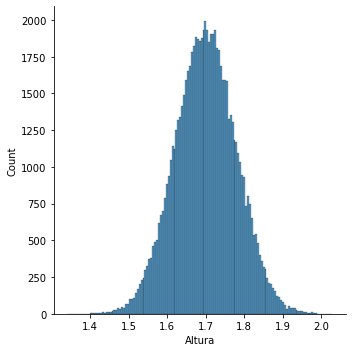

In [47]:
ax = sns.displot(dados.Altura, kde = False)

Criada a variável, começaremos a configurar alguns parâmetros em ax na mesma célula. Aplicaremos .fig com .set_size_inches() para configurarmos o tamanho do gráfico com 12 polegadas de largura e 6 de altura que queremos visualizar no notebook.

Em seguida, setaremos o título 'Distribuição de Frequências - Altura' e o fontsize como 18 dentro de set(title ="Distribuição de Frequências - Altura", xlabel='Metros').

Em seguida, configuraremos o label do eixo x como 'Metros' e o tamanho de fonte 14 dentro do método  set(xlabel='Metros').

Por fim, chamaremos ax para mostrarmos o gráfico de fato.

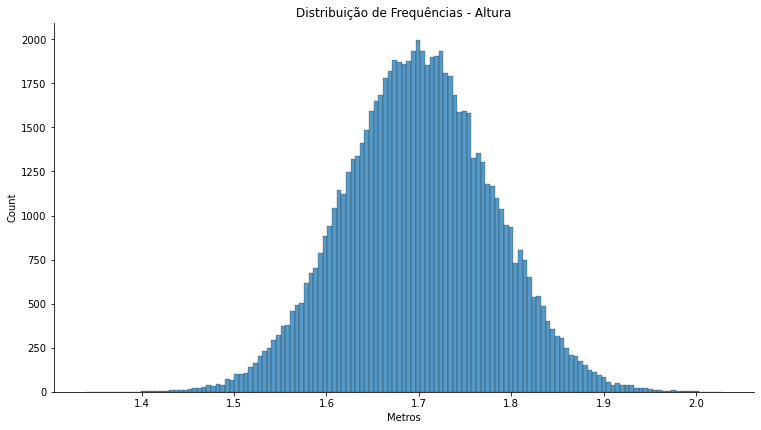

In [48]:
ax = sns.displot(dados.Altura, kde = False) 
ax.fig.set_size_inches(12,6) 
ax.set(title ="Distribuição de Frequências - Altura", xlabel='Metros') 
ax

Como resultado, veremos um Histograma composto por barras unidas cuja área é proporcional à frequência da classe, o qual possui seu pico por volta do valor "17" do eixo X.

Como o padrão de kde é igual a True, retiraremos este parâmetro para vermos a função de densidade no Histograma.

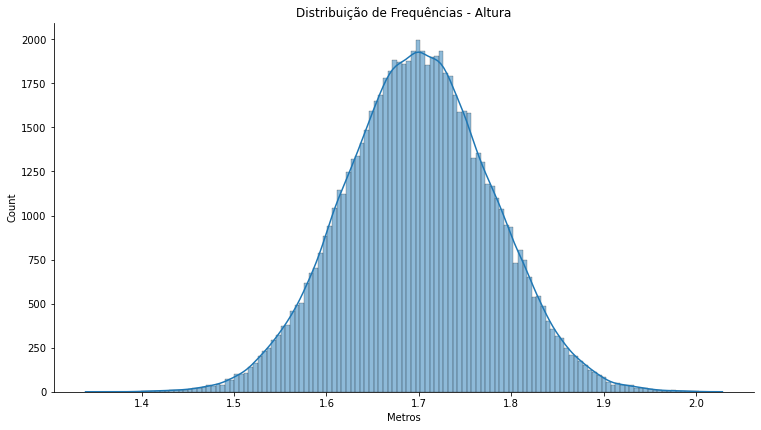

In [49]:
ax = sns.displot(dados.Altura, kde = True) 

ax.fig.set_size_inches(12,6) 
ax.set(title ="Distribuição de Frequências - Altura", xlabel='Metros') 
ax

Com isso, poderemos fazer comparações diversas.

Como este último Histograma foi gerado a partir de uma Distribuição normal, possui uma forma bastante simétrica com um expressivo pico central.

Poderemos fazer a mesma coisa utilizando somente a biblioteca Pandas e não a Seaborn, mas teremos menos recursos.

Na célula seguinte, escreveremos dados.Altura seguido de .hist() para traçarmos um Histograma mais simples com apenas dez barras por default.

Como queremos que tenha mais barras e seja mais parecido com o anterior, ou seja, com maior número de classes, definiremos bins como 50 no primeiro parâmetro por exemplo. Também poderemos configurar o tamanho do figsize como (12, 6) no segundo parâmetro.

<AxesSubplot:>

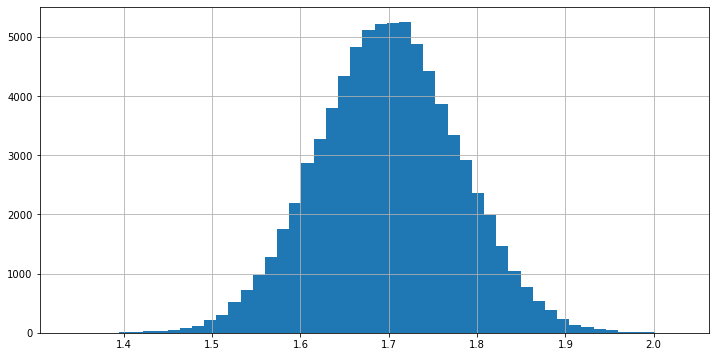

In [50]:
dados.Altura.hist(bins = 50, figsize=(12,6))

Aparentemente, realizamos uma visualização bem parecida com as anteriores. Porém, esta forma com o Pandas possui bem menos recursos, o que é evidente ao entrarmos na documentação da Seaborn.

Em uma nova célula seguinte, faremos uma representação gráfica da variável dist_freq_quantitativas_personalizadas. Começaremos apenas chamando-a para vermos sua Tabela de Frequências personalizada.

In [51]:
dist_freq_quantitativas_personalizadas

,Frequência,Porcentagem (%)
E,49755,0.647514
D,16700,0.217335
C,7599,0.098894
B,2178,0.028345
A,608,0.007913


Porém, não conseguiremos fazer isso com os mesmos recursos já usados. Logo, para obtermos um resultado mais parecido com os Histogramas, criaremos um gráfico de barras passando 'Frequência' para dist_freq_quantitativas_personalizadas[].

Poderíamos fazer com 'Porcentagem (%)' também que o tamanho e a distribuição ficariam os mesmos.

Aplicaremos .plot com .bar() para plotarmos um gráfico de barras. Para que fiquem unidas como nos Histogramas, passaremos o parâmetro width para a largura 1 apenas. Se quisermos, em seguida poderemos configurar a cor com color sendo igual a azul 'blue' por exemplo.

Para ficarmos mais próximos do formato anterior, passaremos alpha para obtermos uma certa transparência com o valor 0.2. Por fim, o figsize será o mesmo utilizado antes.

<AxesSubplot:>

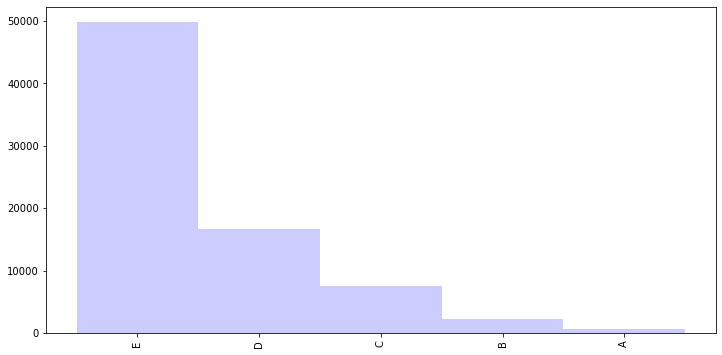

In [52]:
dist_freq_quantitativas_personalizadas['Frequência'].plot.bar(
    width= 1, color= 'blue', alpha = 0.2, figsize= (12, 6)
    )

Com isso, geraremos a representação gráfica da variável dist_freq_quantitativas_personalizadas a partir de os resultados de sua Tabela de Distribuição de Frequências contendo as configurações que aplicamos.

Caso não a tenhamos criado anteriormente, conseguiremos visualizar um gráfico de barras por meio dos métodos hist() e plot.bar() que geram as classes.

# <font color=green>3 MEDIDAS DE TENDÊNCIA CENTRAL</font>
***

Começaremos o novo tópico de Medidas de Tendência Central.

Neste grupo de assuntos, falaremos sobre a média aritmética, mediana e média. Ao final, abordaremos a relação entre essas medidas.

Faremos um DataFrame dentro da variável df que nos ajudará no entendimento desses cálculos. Em seguida, o aplicaremos em nosso dataset maior.

Este será relativo às notas de três alunos fictícios em sete matérias escolares diferentes.

## DataFrame de exemplo

In [53]:
df = pd.DataFrame(data = {'Fulano': [8, 10, 4, 8, 6, 10, 8],
                          'Beltrano': [10, 2, 0.5, 1, 3, 9.5, 10],
                          'Sicrano': [7.5, 8, 7, 8, 8, 8.5, 7]},
                 index = ['Matemática',
                          'Português',
                          'Inglês',
                          'Geografia',
                          'História',
                          'Física',
                          'Química'])
df.rename_axis('Matérias', axis = 'columns', inplace = True)
df

Matérias,Fulano,Beltrano,Sicrano
Matemática,8,10.0,7.5
Português,10,2.0,8.0
Inglês,4,0.5,7.0
Geografia,8,1.0,8.0
História,6,3.0,8.0
Física,10,9.5,8.5
Química,8,10.0,7.0


## <font color=green>3.1 Média aritmética</font>
***

Nas etapas anteriores, fizemos uma sumarização dos dados, reduzindo-os para tentarmos entender um conjunto que é bastante grande, como em nosso caso onde temos mais de 70 mil registros ou observações.

Tentaremos sumarizar ainda mais por meio de uma medida que pegará uma informação importante do conjunto.

Começaremos falando sobre a média aritmética; 

é basicamente o centro de massa da distribuição de uma variável, equilibrando-a. Por ser muito sensível aos extremos, às vezes esta medida não é a mais indicada para representar algumas variáveis, justamente por conta desta sensibilidade.


> É representada por $\mu$ quando se refere à população e por $\bar{X}$ quando se refere à amostra

# $$\mu = \frac 1n\sum_{i=1}^{n}X_i$$

onde 

> $n$ = número de observações (registros)

> $X_i$ = valor da i-ésima observação (registro)


Em nossa variável Renda por exemplo, vimos que a grande maioria das pessoas recebe um baixo rendimento mensal e poucas possuem altas rendas, afinal a desigualdade social é bastante expressiva no Brasil. Logo, a média não é capaz de representar este conjunto de dados corretamente.

De volta ao DataFrame deste passo, calcularemos manualmente somente a média neste primeiro momento, e depois lidaremos com as demais medidas de outra forma.

Na primeira célula da parte "3.1 Média aritmética", copiaremos as notas de Fulano e as colaremos dentro de parênteses para aplicarmos a fórmula. Somaremos todos os valores e dividiremos pela quantidade de matérias existentes.

Logo, trocaremos as vírgulas pelo símbolo de + para realizarmos a somatória e dividiremos o resultado por 7.

In [54]:
(8 + 10 + 4 + 8 + 6 + 10 + 8) / 7

7.714285714285714

Como retorno, veremos a média 7.714285714285714 exibida na saída.

Porém, não poderemos calcular assim todas as vezes, pois em nosso dataset existem mais de 70 mil registros por exemplo, o que tornaria a operação inviável desta forma.

Começaremos com a variável df[] com 'Fulano', pois a biblioteca Pandas disponibiliza uma função .mean() para calcular a média.

In [55]:
df['Fulano'].mean()

7.714285714285714

O retorno será o mesmo valor apresentado antes, porém fizemos a mesma operação de maneira mais simples.

De volta ao nosso dataset oficial, calcularemos da mesma forma para descobrirmos a média da Renda.

In [56]:
dados.Renda.mean()

2000.3831988547631

Com a saída do valor 2000.3831988547631, veremos que a média dos rendimentos dentro da pesquisa é de aproximadamente R$2.000,00.

Mais adiante neste curso, veremos as influências dos extremos neste cálculo para a coerência da análise.

Em uma nova célula, veremos novamente só os cinco primeiros registros de nosso dataset.

In [57]:
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


No começo do curso, abordamos os tipos de variáveis e vimos que alguns deles não permitem o cálculo da média por motivos óbvios, como no caso das qualitativas nominais Sexo, Cor e UF.

Poderemos usar estas variáveis para nos auxiliar nas análises como filtros ou by, como a renda média por cada sexo por exemplo.

Chamaremos nossos dados novamente. Em seguida, aplicaremos a funcionalidade .groupby() do Pandas para agruparmos o resultado dentro da variável 'Sexo', e calcularemos a média com .mean().

In [58]:
media_dados_por_sexo = dados.groupby(['Sexo']).mean()
media_dados_por_sexo.rename(index = sexo, inplace = True)
media_dados_por_sexo

,UF,Idade,Cor,Anos de Estudo,Renda,Altura
Sexo,,,,,,
Masculino,31.901991,44.046554,5.038685,9.120169,2192.441596,1.699443
Feminino,31.937728,44.127554,5.018906,10.258584,1566.847393,1.699670


Com esta execução, o sistema calculará a média de todas as variáveis do dataset para cada sexo, incluindo aquelas que não poderiam ser calculadas.

Portanto, escolheremos quais queremos calcular. Antes de .mean(), pediremos somente a 'Renda'.

In [59]:
renda_media_por_sexo = dados.groupby(['Sexo'])['Renda'].mean()
renda_media_por_sexo.rename(index = sexo, inplace = True)
renda_media_por_sexo

Sexo
Masculino    2192.441596
Feminino     1566.847393
Name: Renda, dtype: float64

## <font color=green>3.2 Mediana</font>
***

Para obtermos a mediana de uma conjunto de dados devemos proceder da seguinte maneira:
1. Ordenar o conjunto de dados;
2. Identificar o número de observações (registros) do conjunto de dados ($n$);
3. Identicar o elemento mediano:

> Quando $n$ for ímpar, a posição do elemento mediano será obtida da seguinte forma:


# $$Elemento_{Md} = \frac{n+1}2$$

> Quando $n$ for par, a posição do elemento mediano será obtida da seguinte forma:


# $$Elemento_{Md} = \frac{n}2$$

4. Obter a mediana:

> Quando $n$ for ímpar:


# $$Md = X_{Elemento_{Md}}$$

> Quando $n$ for par:


# $$Md = \frac{X_{Elemento_{Md}} + X_{Elemento_{Md}+1}}2$$
***

Em nosso primeiro exemplo, teremos uma série desordenada com cinco valores: [ 6, 4, 3, 9, 1]. Quando organizarmos de forma crescente, obteremos [ 1, 3, 4, 6, 9 ].

Como a quantidade de registros no conjunto é ímpar, aplicaremos sua fórmula correta. O "n" é este número "5" de observações somado com "1", resultando em "6". Por fim, dividiremos por "2" e obteremos o resultado "3".

Este valor significará a terceira posição do conjunto, a qual é relativa ao elemento mediano, ou seja, o 4 será a medida mediana "Md" deste exercício.

Entenderemos esse cálculo na prática com nosso dataset df com o boletim de notas criado anteriormente como exemplo.

Na primeira célula desta parte do nosso notebook, criaremos a variável notas_fulano para o primeiro aluno. Esta será igual a df.Fulano e, em seguida, exibiremos as notas de notas_fulano.

### Exemplo 1 - n ímpar

<img src='https://caelum-online-public.s3.amazonaws.com/1177-estatistica-parte1/01/img002.png' width='40%' style="float:left">

In [60]:
notas_fulano = df.Fulano
notas_fulano

Matemática     8
Português     10
Inglês         4
Geografia      8
História       6
Física        10
Química        8
Name: Fulano, dtype: int64

Na célula seguinte, notas_fulano será igual a notas_fulano com o método Pandas .sort_value() que organizará os valores de maneira crescente.

In [61]:
notas_fulano = notas_fulano.sort_values()
notas_fulano

Inglês         4
História       6
Matemática     8
Geografia      8
Química        8
Português     10
Física        10
Name: Fulano, dtype: int64

Isso não precisará ser feito todas as vezes que quisermos calcular a mediana, mas é importante fazermos este passo-a-passo para a operação ficar bem clara.

Logo, para entendermos bem a posição mediana, escreveremos notas_fulano com um outro método Pandas chamado .reset_index() que retirará o índice anterior organizado pelos nomes das matérias da series, e o transformará em uma variável index do DataFrame.

In [62]:
notas_fulano = notas_fulano.reset_index()
notas_fulano

,index,Fulano
0,Inglês,4
1,História,6
2,Matemática,8
3,Geografia,8
4,Química,8
5,Português,10
6,Física,10


Com este novo índice numérico de 0 a 6, veremos com clareza a posição 3 do elemento mediano Geografia com nota de Fulano 8, pois temos sete registros neste exemplo, e "7" é um número ímpar.

Para confirmarmos na prática, aplicaremos a fórmula na célula seguinte; escreveremos n sendo igual a notas-fulano com .shape[] recebendo 0. Em seguida, exibiremos apenas n para obtermos o resultado.

In [63]:
n = notas_fulano.shape[0]
n

7

O resultado da operação será 7, correspondendo à quantidade de sete observações no conjunto de dados.

Na célula seguinte, obteremos elemento_md sendo igual a (n + 1) dividido por 2. Depois, exibiremos elemento_md.

In [64]:
elemento_md = (n + 1) / 2
elemento_md

4.0

O elemento mediano apresentado está na posição 4.0. De acordo com a tabela com index, corresponde à Geografia identificada pelo número 3.

Como se trata de um conjunto de dados bastante pequeno, este cálculo está bem simples. Mas em muitas situações, teremos uma grande tabela para lidarmos, como no caso de nosso dataset principal do curso.

É importante nos atentarmos às diferenças de cálculo entre quantidades pares e ímpares, conforme as fórmulas apresentadas.

Continuando, escreveremos notas_fulano na célula seguinte, e aplicaremos o loc[] que selecionará um item dentro do DataFrame ou series.

Dentro, passaremos o elemento mediano elemento_md com -1 para encontrá-lo. É importante não esquecermos desta subtração.

In [65]:
notas_fulano.loc[elemento_md - 1]

index     Geografia
Fulano            8
Name: 3, dtype: object

O resultado do index será Geografia com a nota 8 de Fulano, cuja identificação é 3.

Para calcularmos o mesmo valor utilizando a biblioteca Pandas para não precisarmos fazer tantas contas, chamaremos apenas notas_fulano com o método .median().

In [66]:
notas_fulano.median()

Fulano    8.0
dtype: float64

### Exemplo 2 - n par

<img src='https://caelum-online-public.s3.amazonaws.com/1177-estatistica-parte1/01/img003.png' width='50%' style="float:left">

O retorno exibirá a mediana correspondente à nota 8.0 de Fulano.

Para auxiliar no experimento, pegaremos as notas de Beltrano por meio da notas_beltrano, contendo uma amostra aleatória de apenas 6 registros por meio de sample().

O parâmetro random_state é um gerador de número aleatório. Repetindo o valor 101 apresentado aqui, será possível obter exatamente a mesma seleção deste experimento.

In [67]:
notas_beltrano = df.Beltrano.sample(6, random_state = 101)
notas_beltrano

Matemática    10.0
Inglês         0.5
Física         9.5
História       3.0
Química       10.0
Português      2.0
Name: Beltrano, dtype: float64

Realizando toda a operação necessária para encontrar a mediana, obteremos o valor 6.25 de notas_beltrano ao final do exercício com n sendo um número par.

In [68]:
notas_beltrano.median()

6.25

Para realizarmos a análise descritiva dos dados de nosso projeto, iremos para a parte "Obtendo a mediana em nosso dataset".

Na primeira célula, começaremos pela Renda. Recomendamos que também faça com as demais variáveis como exercício.

In [69]:
dados.Renda.median()

1200.0

O resultado da operação será 1200.0.

Há uma outra maneira de obtermos o resultado que será melhor abordada adiante nas Medidas Separatrizes; com o método quantile() vazio, teremos o mesmo valor de resultado.

Isso acontece porque seu default é q=0.5, o que significa que partiremos o conjunto exatamente na metade para pegarmos a mediana da mesma forma. Poderemos acessar essa informação e outras no "Help" deste método, escrevendo apenas ? no lugar dos parênteses do método e executando a célula.

In [71]:
dados.Renda.quantile()

1200.0

Portanto, também é possível obtermos a mediana com quantile(), bem como outros valores que serão vistos mais adiante em Medidas Separatrizes.

## <font color=green>3.3 Moda</font>
***

Pode-se definir a moda como sendo o valor mais frequente de um conjunto de dados. A moda é bastante utilizada para dados qualitativos.

Esta é a mais fácil de definir entre as demais Medidas de Tendência Central, pois é justamente o valor mais frequente dentro de um conjunto de dados.

In [72]:
df

Matérias,Fulano,Beltrano,Sicrano
Matemática,8,10.0,7.5
Português,10,2.0,8.0
Inglês,4,0.5,7.0
Geografia,8,1.0,8.0
História,6,3.0,8.0
Física,10,9.5,8.5
Química,8,10.0,7.0


Observando somente as notas de Beltrano, é evidente que a moda com o valor que mais aparece é a "10.0", pois temos um pequeno conjunto de dados. Já para fulano, a nota modal é "8".

É possível termos mais de uma moda dentro em um dataset; por exemplo, se houver apenas duas, chamaremos a variável como bimodal. Caso tenhamos mais, será multimodal.

Na célula seguinte, obteremos a medida com o método .mode() da biblioteca Pandas.

In [73]:
df.mode()

Matérias,Fulano,Beltrano,Sicrano
0,8,10.0,8.0


No retorno, veremos um Dataframe com os valores modais.

Para termos um exemplo de variáveis multimodais, criaremos a exemplo sendo igual a uma nova pd.Series() contendo uma lista de valores.

In [74]:
exemplo = pd.Series([1, 2, 2, 3, 4, 4, 5, 6, 6])

Com isso, veremos a mesma quantidade de ocorrências dos valores 2, 4 e 6. Chamando somente exemplo na sequência, veremos o seguinte resultado:

In [75]:
exemplo

0    1
1    2
2    2
3    3
4    4
5    4
6    5
7    6
8    6
dtype: int64

Obtendo este índice com os valores, aplicaremos exemplo com .mode().

In [76]:
exemplo.mode()

0    2
1    4
2    6
dtype: int64

O resultado será uma series com os três valores modais 2, 4 e 6, provando que a variável é multimodal de fato. Se alterássemos o último valor para 7, o resultado seria apenas 2 e 4 e a variável apenas bimodal.

Portanto, esta medida apresenta os valores que são mais frequentes em um conjunto de dados.

Este tipo de Estatística Descritiva é bastante utilizada com variáveis qualitativas que possuem valores categóricos, pois as contínuas podem ter inúmeras modas por exemplo.

Em "Obtendo a moda em nosso dataset", escreveremos dados com a variável Renda seguida de mode() apenas para avaliarmos o retorno.

### Obtendo a moda em nosso dataset

In [77]:
dados.Renda.mode()

0    788
dtype: int64

Como resultado, veremos o valor 788 que corresponde ao salário mínimo no ano de 2015 quando a PNAD foi realizada. Como já vimos, a grande maioria das pessoas possuem baixa renda por conta da grande desigualdade social, logo faz sentido que este número ocorra com mais frequência.

Na célula seguinte, pegaremos a moda da variável Altura que resultará na seguinte saída:

In [78]:
dados.Altura.mode()

0    1.568128
1    1.671225
2    1.681659
3    1.692977
4    1.708163
5    1.708370
6    1.753842
7    1.779073
8    1.796462
dtype: float64

Logo, veremos que este elemento é multimodal e possui nove modas no conjunto de valores. Também veremos que esta medida para um valor contínuo não significa muito para nossa análise.

## <font color=green>3.4 Relação entre média, mediana e moda</font>
***

<img src='https://caelum-online-public.s3.amazonaws.com/1177-estatistica-parte1/01/img004.png' width='80%'>

### Avaliando a variável RENDA

***

### Avaliando a variável ALTURA

***

### Avaliando a variável ANOS DE ESTUDO

# <font color=green>4 MEDIDAS SEPARATRIZES</font>
***

## <font color=green>4.1 Quartis, decis e percentis</font>
***

Há uma série de medidas de posição semelhantes na sua concepção à mediana, embora não sejam medidas de tendência central. Como se sabe, a mediana divide a distribuição em duas partes iguais quanto ao número de elementos de cada parte. Já os quartis permitem dividir a distribuição em quatro partes iguais quanto ao número de elementos de cada uma; os decis em dez partes e os centis em cem partes iguais.

## <font color=green>4.2 Box-plot</font>
***

O box plot dá uma idéia da posição, dispersão, assimetria, caudas e dados discrepantes (outliers). A posição central é dada pela mediana e a dispersão por $IIQ$. As posições relativas de $Q1$, $Mediana$ e $Q3$ dão uma noção da simetria da distribuição. Os comprimentos das cauda são dados pelas linhas que vão do retângulo aos valores remotos e pelos valores atípicos.

<img src='https://caelum-online-public.s3.amazonaws.com/1177-estatistica-parte1/01/img005.png' width='65%'>

<img src='https://caelum-online-public.s3.amazonaws.com/1177-estatistica-parte1/01/img006.png' width='80%'>

# <font color=green>5 MEDIDAS DE DISPERSÃO</font>
***

Embora as medidas de posição forneçam uma sumarização bastante importante dos dados, elas podem não ser suficientes para caracterizar conjuntos distintos, especialmente quando as observações de determinada distribuição apresentarem dados muito dispersos.

## <font color=green>5.1 Desvio médio absoluto</font>
***


# $$DM = \frac 1n\sum_{i=1}^{n}|X_i-\bar{X}|$$


## <font color=green>5.2 Variância</font>
***

### Variância

A variância é construída a partir das diferenças entre cada observação e a média dos dados, ou seja, o desvio em torno da média. No cálculo da variância, os desvios em torno da média são elevados ao quadrado.

### Variância populacional

# $$\sigma^2 = \frac 1n\sum_{i=1}^{n}(X_i-\mu)^2$$

### Variância amostral

# $$S^2 = \frac 1{n-1}\sum_{i=1}^{n}(X_i-\bar{X})^2$$

## <font color=green>5.3 Desvio padrão</font>
***

Uma das restrições da variância é o fato de fornecer medidas em quadrados das unidades originais - a variância de medidas de comprimento, por exemplo, é em unidades de área. Logo, o fato de as unidades serem diferentes dificulta a comparação da dispersão com as variáveis que a definem. Um modo de eliminar essa dificuldade é considerar sua raiz quadrada.

### Desvio padrão populacional

# $$\sigma = \sqrt{\frac 1n\sum_{i=1}^{n}(X_i-\mu)^2} \Longrightarrow \sigma = \sqrt{\sigma^2}$$

### Desvio padrão amostral

# $$S = \sqrt{\frac 1{n-1}\sum_{i=1}^{n}(X_i-\bar{X})^2} \Longrightarrow S = \sqrt{S^2}$$